# `01-import` Notebook

Notebooks are numbered in the order they should be run (for data import projects) or according to a table of contents:

* `00-setup` - initial environment setup and proof of concept
* `01-explore` - exploratory data analysis

In [18]:
# pip install neo4j
# pip install osmnx

In [19]:
import neo4j
import osmnx as ox

In [21]:
NEO4J_URI = "<YOUR_NEO4J_URI_HERE>"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "<YOUR_NEO4J_PASSWORD_HERE>"

driver = neo4j.GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))

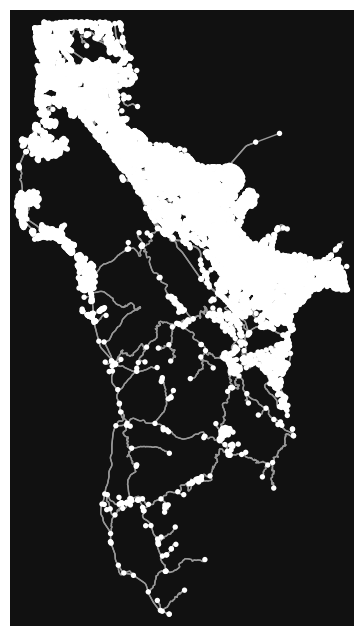

In [22]:
G = ox.graph_from_place("San Mateo, CA, USA", network_type="drive")
fig, ax = ox.plot_graph(G)


In [23]:
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)
gdf_nodes.reset_index(inplace=True)
gdf_relationships.reset_index(inplace=True)

,osmid,y,x,ref,highway,street_count,geometry
0,281266,37.560184,-122.302578,414B,motorway_junction,3,POINT (-122.30258 37.56018)
1,26028129,37.481955,-122.177346,406,motorway_junction,3,POINT (-122.17735 37.48195)
2,26028133,37.483360,-122.180471,NaN,NaN,3,POINT (-122.18047 37.48336)
3,26029745,37.484536,-122.184170,NaN,NaN,3,POINT (-122.18417 37.48454)
4,26029880,37.541234,-122.284734,414A,motorway_junction,3,POINT (-122.28473 37.54123)
...,...,...,...,...,...,...,...
18519,10728812211,37.508365,-122.260331,NaN,NaN,3,POINT (-122.26033 37.50837)
18520,10732342203,37.506559,-122.341075,NaN,NaN,3,POINT (-122.34108 37.50656)
18521,10736534011,37.580917,-122.403461,NaN,NaN,3,POINT (-122.40346 37.58092)
18522,10736534024,37.580824,-122.403925,NaN,NaN,2,POINT (-122.40392 37.58082)


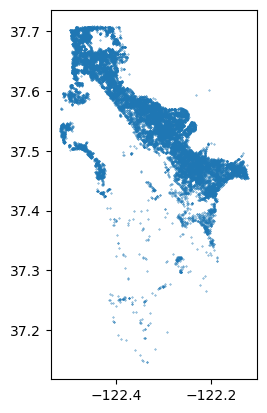

In [24]:
gdf_nodes.plot(markersize=0.1)
gdf_nodes

,u,v,key,osmid,oneway,lanes,ref,name,highway,maxspeed,reversed,length,geometry,bridge,junction,access,tunnel
0,281266,702274215,0,24054675,True,5,US 101,Bayshore Freeway,motorway,65 mph,False,1327.761,"LINESTRING (-122.30258 37.56018, -122.30222 37...",NaN,NaN,NaN,NaN
1,281266,65358141,0,"[512386104, 8920615]",True,3,NaN,NaN,motorway_link,65 mph,False,321.476,"LINESTRING (-122.30258 37.56018, -122.30161 37...",NaN,NaN,NaN,NaN
2,26028129,65388878,0,"[385243928, 392651465, 679545026, 8924237]",True,"[4, 3, 2, 1]",NaN,NaN,motorway_link,45 mph,False,377.868,"LINESTRING (-122.17735 37.48195, -122.17752 37...",NaN,NaN,NaN,NaN
3,26028129,26028133,0,395436903,True,4,US 101,Bayshore Freeway,motorway,65 mph,False,317.315,"LINESTRING (-122.17735 37.48195, -122.17744 37...",NaN,NaN,NaN,NaN
4,26028133,26029745,0,395436903,True,4,US 101,Bayshore Freeway,motorway,65 mph,False,351.773,"LINESTRING (-122.18047 37.48336, -122.18184 37...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46808,10736534011,65394701,0,1154445568,True,NaN,NaN,NaN,secondary_link,NaN,False,55.233,"LINESTRING (-122.40346 37.58092, -122.40337 37...",NaN,NaN,NaN,NaN
46809,10736534024,10736534011,0,309380070,False,2,NaN,Trousdale Drive,secondary,NaN,True,42.156,"LINESTRING (-122.40392 37.58082, -122.40346 37...",NaN,NaN,NaN,NaN
46810,10736534024,10736534025,0,1154445569,True,1,NaN,Trousdale Drive,secondary,NaN,False,61.673,"LINESTRING (-122.40392 37.58082, -122.40400 37...",NaN,NaN,NaN,NaN
46811,10736534025,65511594,0,"[27425512, 409952518, 409952519]",True,2,NaN,NaN,motorway_link,NaN,False,470.171,"LINESTRING (-122.40457 37.58068, -122.40453 37...",NaN,NaN,NaN,NaN


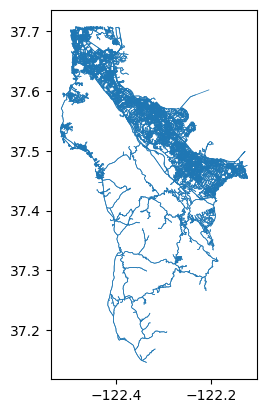

In [25]:
gdf_relationships.plot(markersize=0.01, linewidth=0.5)
gdf_relationships

In [27]:

constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (i:Intersection) REQUIRE i.osmid IS UNIQUE"

rel_index_query = "CREATE INDEX IF NOT EXISTS FOR ()-[r:ROAD_SEGMENT]-() ON r.osmids"


node_query = '''
    UNWIND $rows AS row
    WITH row WHERE row.osmid IS NOT NULL
    MERGE (i:Intersection {osmid: row.osmid})
        SET i.location = 
         point({latitude: row.y, longitude: row.x }),
            i.ref = row.ref,
            i.highway = row.highway,
            i.street_count = toInteger(row.street_count)
    RETURN COUNT(*) as total
    '''

rels_query = '''
    UNWIND $rows AS road
    MATCH (u:Intersection {osmid: road.u})
    MATCH (v:Intersection {osmid: road.v})
    MERGE (u)-[r:ROAD_SEGMENT {osmid: road.osmid}]->(v)
        SET r.oneway = road.oneway,
            r.lanes = road.lanes,
            r.ref = road.ref,
            r.name = road.name,
            r.highway = road.highway,
            r.max_speed = road.maxspeed,
            r.length = toFloat(road.length)
    RETURN COUNT(*) AS total
    '''

In [31]:
def create_constraints(tx):
    results = tx.run(constraint_query)
    results = tx.run(rel_index_query)

In [32]:
def insert_data(tx, query, rows, batch_size=10000):
    total = 0
    batch = 0
    
    while batch * batch_size < len(rows):
        results = tx.run(query, parameters = {'rows': rows[batch*batch_size:(batch+1)*batch_size].to_dict('records')}).data()
        print(results)
        total += results[0]['total']
        batch += 1

In [33]:
with driver.session() as session:
    session.execute_write(create_constraints)
    session.execute_write(insert_data, node_query, gdf_nodes.drop(columns=['geometry'])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 8524}]


In [34]:
with driver.session() as session:
    session.execute_write(insert_data, rels_query, gdf_relationships.drop(columns=['geometry'])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 6813}]
